# Line Regression predictive modeling

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
import folium
import json
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
path = r'Desktop/CF/Achievement 6/Data Sets/NYPD_New_Set.pkl'
path2 = r'Desktop/CF/Achievement 6/Data Sets/NYPD_S_Cleaned.pkl'
path_orig = r'Desktop/CF/Achievement 6/Data Sets'

### I decided to continue to analyize and play with the new data set and the old one in case I wanted to make some changes

In [3]:
df = pd.read_pickle(os.path.join(path))
dt = pd.read_pickle(os.path.join(path2))

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/CF/Achievement 6/Data Sets/NYPD_New_Set.pkl'

In [85]:
dt['Law_Cat'].value_counts()

Law_Cat
DANGEROUS DRUGS                                146277
ASSAULT 3 & RELATED OFFENSES                   143721
PETIT LARCENY                                   76584
FELONY ASSAULT                                  70068
MISCELLANEOUS PENAL LAW                         52699
VEHICLE AND TRAFFIC LAWS                        50011
ROBBERY                                         43523
DANGEROUS WEAPONS                               42070
GRAND LARCENY                                   39508
CRIMINAL MISCHIEF & RELATED OF                  27519
OTHER TRAFFIC INFRACTION                        25859
CRIMINAL TRESPASS                               23803
BURGLARY                                        23522
FORGERY                                         21592
INTOXICATED & IMPAIRED DRIVING                  20289
OTHER OFFENSES RELATED TO THEFT                 19480
CRIMINAL MISCHIEF & RELATED OFFENSES            18012
OFFENSES AGAINST PUBLIC ADMINI                  17406
OFFENSES AGAINST PUB

In [84]:

pd.options.display.max_rows = None


In [4]:
df.head()

,Year,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,ARREST_KEY,Crime_Frequency,Age_Code
0,2018.0,Bronx,40.0,18-24,1469,Mid Frequency,2.0
1,2018.0,Bronx,40.0,25-44,3563,High Frequency,3.0
2,2018.0,Bronx,40.0,45-64,1313,Mid Frequency,4.0
3,2018.0,Bronx,40.0,65+,45,Low Frequency,5.0
4,2018.0,Bronx,40.0,Under 18,340,Low Frequency,1.0


In [6]:
df.shape

(1567, 7)

In [8]:
df.isnull().sum()

Year               0
ARREST_BORO        0
ARREST_PRECINCT    0
AGE_GROUP          0
ARREST_KEY         0
Crime_Frequency    0
Age_Code           0
dtype: int64

In [9]:
dups = df.duplicated()


In [10]:
dups.shape

(1567,)

### After brainstorming I found that if I create a crosstab between crimes and precincts I can get closer to finding relationships 
### between crimes and therefore find correlations that can help that question as to where to anticipate certain crimes.

In [63]:
cb = pd.crosstab(dt['ARREST_PRECINCT'], dt['Law_Cat'], dropna = False)

In [64]:
cb

Law_Cat,ABORTION,ADMINISTRATIVE CODE,ADMINISTRATIVE CODES,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,ALCOHOLIC BEVERAGE CONTROL LAW,ANTICIPATORY OFFENSES,ARSON,ASSAULT 3 & RELATED OFFENSES,BURGLAR'S TOOLS,BURGLARY,...,ROBBERY,SEX CRIMES,THEFT OF SERVICES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,UNAUTHORIZED USE OF A VEHICLE 3 (UUV),UNLAWFUL POSS. WEAP. ON SCHOOL,UNLAWFUL POSS. WEAP. ON SCHOOL GROUNDS,Unknown,VEHICLE AND TRAFFIC LAWS
ARREST_PRECINCT,,,,,,,,,,,,,,,,,,,,,
1.0,0,1,0,1,1,2,4,923,85,426,...,304,113,141,63,9,7,0,0,76,355
5.0,0,14,0,4,19,32,14,1193,34,543,...,572,490,25,263,9,5,0,0,90,475
6.0,0,11,0,0,1,1,4,947,131,538,...,943,89,1,7,5,4,0,0,11,179
7.0,0,2,0,0,3,2,2,1359,40,316,...,429,90,46,23,2,12,0,0,45,753
9.0,0,3,0,1,1,0,15,1266,88,447,...,385,98,4,35,4,4,0,0,21,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115.0,0,28,0,1,42,0,22,3085,48,275,...,725,549,78,35,27,35,0,0,57,1196
120.0,0,3,0,2,7,1,23,2592,12,293,...,808,294,0,35,33,24,0,1,22,827
121.0,0,1,0,4,9,0,6,1203,18,162,...,214,100,0,12,41,9,0,0,6,650


### I turned it into a data set

In [68]:
DT_N = cb.reset_index(0)

## Then I dropped the columns that had a less than 1000 value count from the iteration above

In [92]:
DT_N = DT_N.drop(columns=['MOVING INFRACTIONS'])
DT_N = DT_N.drop(columns=['THEFT OF SERVICES'])
DT_N = DT_N.drop(columns=['ARSON'])
DT_N = DT_N.drop(columns=['OFFENSES AGAINST PUBLIC SAFETY'])
DT_N = DT_N.drop(columns=['FRAUDULENT ACCOSTING'])
DT_N = DT_N.drop(columns=['KIDNAPPING & RELATED OFFENSES'])
DT_N = DT_N.drop(columns=['HARRASSMENT 2'])
DT_N = DT_N.drop(columns=['OFFENSES RELATED TO CHILDREN'])
DT_N = DT_N.drop(columns=['ANTICIPATORY OFFENSES'])
DT_N = DT_N.drop(columns=['ENDAN WELFARE INCOMP'])
DT_N = DT_N.drop(columns=['AGRICULTURE & MRKTS LAW-UNCLASSIFIED'])
DT_N = DT_N.drop(columns=['JOSTLING'])
DT_N = DT_N.drop(columns=['HARASSMENT'])
DT_N = DT_N.drop(columns=['ESCAPE 3'])
DT_N = DT_N.drop(columns=['CHILD ABANDONMENT/NON SUPPORT'])
DT_N = DT_N.drop(columns=['LOITERING/GAMBLING (CARDS, DICE, ETC)'])
DT_N = DT_N.drop(columns=['LOITERING FOR DRUG PURPOSES'])
DT_N = DT_N.drop(columns=['LOITERING'])
DT_N = DT_N.drop(columns=['CHILD ABANDONMENT/NON SUPPORT 1'])
DT_N = DT_N.drop(columns=['HOMICIDE-NEGLIGENT,UNCLASSIFIE'])
DT_N = DT_N.drop(columns=['LOITERING/GAMBLING (CARDS, DIC'])
DT_N = DT_N.drop(columns=['HOMICIDE-NEGLIGENT-VEHICLE'])
DT_N = DT_N.drop(columns=['HOMICIDE-NEGLIGENT,UNCLASSIFIED'])
DT_N = DT_N.drop(columns=['ADMINISTRATIVE CODES'])
DT_N = DT_N.drop(columns=['KIDNAPPING'])
DT_N = DT_N.drop(columns=['PARKING OFFENSES'])
DT_N = DT_N.drop(columns=['UNLAWFUL POSS. WEAP. ON SCHOOL GROUNDS'])
DT_N = DT_N.drop(columns=['DISRUPTION OF A RELIGIOUS SERV'])
DT_N = DT_N.drop(columns=['NYS LAWS-UNCLASSIFIED VIOLATION'])
DT_N = DT_N.drop(columns=['FELONY SEX CRIMES'])
DT_N = DT_N.drop(columns=['KIDNAPPING AND RELATED OFFENSES'])
DT_N = DT_N.drop(columns=['UNLAWFUL POSS. WEAP. ON SCHOOL'])



In [93]:
DT_N

Law_Cat,ARREST_PRECINCT,ADMINISTRATIVE CODE,ALCOHOLIC BEVERAGE CONTROL LAW,ASSAULT 3 & RELATED OFFENSES,BURGLAR'S TOOLS,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL MISCHIEF & RELATED OFFENSES,CRIMINAL TRESPASS,DANGEROUS DRUGS,...,POSSESSION OF STOLEN PROPERTY 5,PROSTITUTION & RELATED OFFENSES,RAPE,ROBBERY,SEX CRIMES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,UNAUTHORIZED USE OF A VEHICLE 3 (UUV),Unknown,VEHICLE AND TRAFFIC LAWS
0,1.0,1,1,923,85,426,635,260,208,218,...,469,20,24,304,113,63,9,7,76,355
1,5.0,14,19,1193,34,543,566,302,307,1001,...,119,127,148,572,490,263,9,5,90,475
2,6.0,11,1,947,131,538,297,188,282,2001,...,219,209,10,943,89,7,5,4,11,179
3,7.0,2,3,1359,40,316,356,212,520,1119,...,84,26,11,429,90,23,2,12,45,753
4,9.0,3,1,1266,88,447,262,240,470,1612,...,309,30,22,385,98,35,4,4,21,331
5,10.0,5,2,885,46,336,261,130,424,1135,...,119,29,9,418,69,29,7,11,17,591
6,13.0,10,1,1444,127,690,370,185,262,954,...,337,78,21,658,197,18,7,7,84,223
7,14.0,89,16,2019,173,985,525,285,693,3630,...,1487,206,26,714,366,96,14,8,268,879
8,17.0,3,0,669,19,322,129,85,150,272,...,43,68,3,175,75,15,4,8,21,420
9,18.0,7,1,1488,44,563,313,229,254,909,...,283,433,13,527,136,47,19,17,70,313


### new Dataset with the counts of each crime  by precinct to have as much rows as I can for my predictions

In [70]:
DT_N

Law_Cat,ARREST_PRECINCT,ABORTION,ADMINISTRATIVE CODE,ADMINISTRATIVE CODES,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,ALCOHOLIC BEVERAGE CONTROL LAW,ANTICIPATORY OFFENSES,ARSON,ASSAULT 3 & RELATED OFFENSES,BURGLAR'S TOOLS,...,ROBBERY,SEX CRIMES,THEFT OF SERVICES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,UNAUTHORIZED USE OF A VEHICLE 3 (UUV),UNLAWFUL POSS. WEAP. ON SCHOOL,UNLAWFUL POSS. WEAP. ON SCHOOL GROUNDS,Unknown,VEHICLE AND TRAFFIC LAWS
0,1.0,0,1,0,1,1,2,4,923,85,...,304,113,141,63,9,7,0,0,76,355
1,5.0,0,14,0,4,19,32,14,1193,34,...,572,490,25,263,9,5,0,0,90,475
2,6.0,0,11,0,0,1,1,4,947,131,...,943,89,1,7,5,4,0,0,11,179
3,7.0,0,2,0,0,3,2,2,1359,40,...,429,90,46,23,2,12,0,0,45,753
4,9.0,0,3,0,1,1,0,15,1266,88,...,385,98,4,35,4,4,0,0,21,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,115.0,0,28,0,1,42,0,22,3085,48,...,725,549,78,35,27,35,0,0,57,1196
73,120.0,0,3,0,2,7,1,23,2592,12,...,808,294,0,35,33,24,0,1,22,827
74,121.0,0,1,0,4,9,0,6,1203,18,...,214,100,0,12,41,9,0,0,6,650
75,122.0,0,2,0,1,1,0,9,1189,10,...,121,128,0,26,26,24,0,0,9,899


## I Started with traffic laws and assault

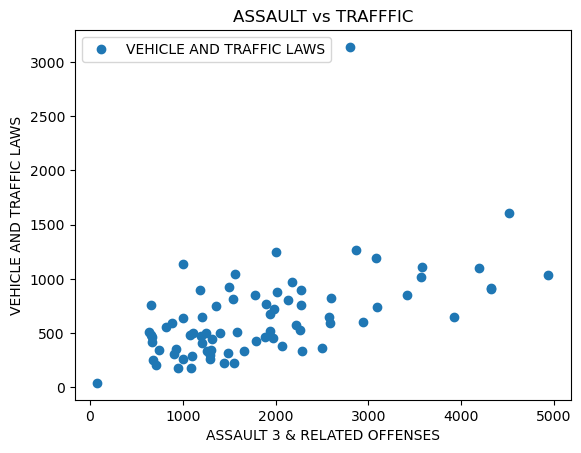

In [71]:
DT_N.plot(x = 'ASSAULT 3 & RELATED OFFENSES', y='VEHICLE AND TRAFFIC LAWS',style='o') 
plt.title('ASSAULT vs TRAFFFIC')  
plt.xlabel('ASSAULT 3 & RELATED OFFENSES')  
plt.ylabel('VEHICLE AND TRAFFIC LAWS')  
plt.show()


In [73]:
X = DT_N['ASSAULT 3 & RELATED OFFENSES'].values.reshape(-1,1)
y = DT_N['VEHICLE AND TRAFFIC LAWS'].values.reshape(-1,1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
regression = LinearRegression()

In [76]:
regression.fit(X_train, y_train)

LinearRegression()

In [77]:
y_predicted = regression.predict(X_test)

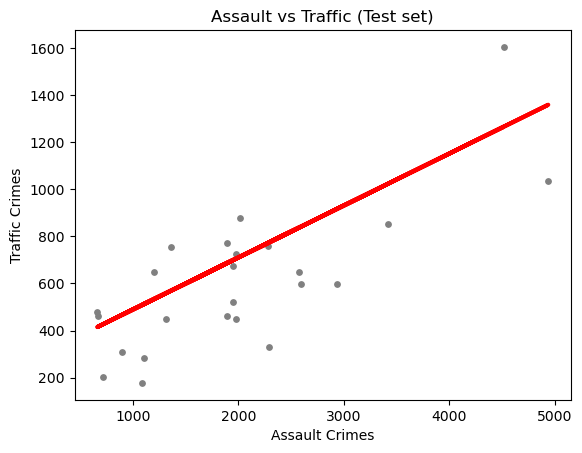

In [78]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Assault vs Traffic (Test set)')
plot_test.xlabel('Assault Crimes')
plot_test.ylabel('Traffic Crimes')
plot_test.show()

In [79]:
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [81]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2206124]]
Mean squared error:  46890.221908514046
R2 score:  0.47212039543672135


In [82]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,463,685.633591
1,650,534.514095
2,332,773.657940
3,310,467.668537
4,673,697.987885
5,1604,1265.402986
6,481,415.162785
7,852,1022.729342
8,598,917.056001
9,462,416.045234


### I saw that this comparison was not so great at predicting Assault  crimes so I moved on to another crime for comparison

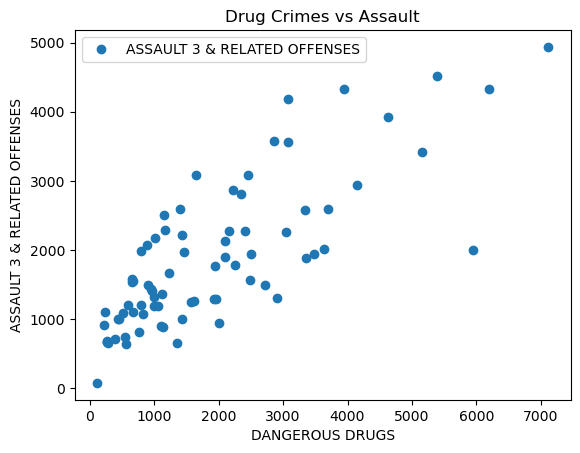

In [95]:
DT_N.plot(x = 'DANGEROUS DRUGS', y='ASSAULT 3 & RELATED OFFENSES',style='o') 
plt.title('Drug Crimes vs Assault')  
plt.xlabel('DANGEROUS DRUGS')  
plt.ylabel('ASSAULT 3 & RELATED OFFENSES')  
plt.show()


In [96]:
X = DT_N['DANGEROUS DRUGS'].values.reshape(-1,1)
y = DT_N['ASSAULT 3 & RELATED OFFENSES'].values.reshape(-1,1)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regression = LinearRegression()

In [98]:
regression.fit(X_train, y_train)

LinearRegression()

In [99]:
y_predicted = regression.predict(X_test)

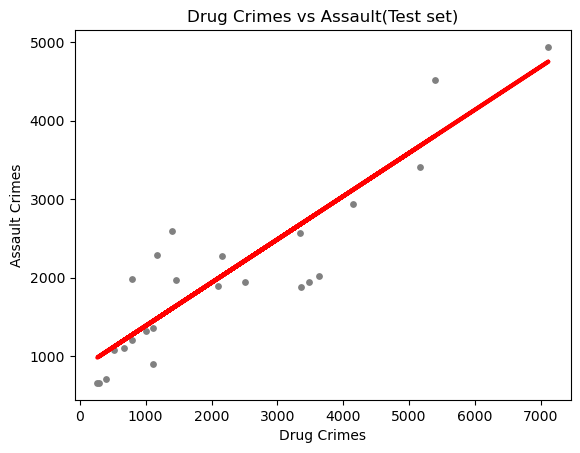

In [100]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Drug Crimes vs Assault(Test set)')
plot_test.xlabel('Drug Crimes')
plot_test.ylabel('Assault Crimes')
plot_test.show()

In [101]:
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [102]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.5499939]]
Mean squared error:  234897.13644900135
R2 score:  0.8008345266800201


In [103]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1888,2681.821373
1,1203,1277.136960
2,2287,1481.734690
3,900,1450.935032
4,1944,2218.176518
5,4516,3802.708934
6,662,994.440097
7,3416,3676.760332
8,2937,3115.766557
9,666,984.540207


## I saw this as a very positive Correlation.
## I would need to see more factors but after Analizing I can say that the higher the drug crimes the higher the assault crimes
## per precinct

In [104]:
DT_N.to_pickle(os.path.join(path_orig,'Crimes_by_Prec.pkl'))